In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
from time import time
import random
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
%pwd


'C:\\Users\\shrey\\Desktop\\ML-DL-NLP\\Projects\\Practice'

In [5]:
my_path = 'C:\\Users\\shrey\\Desktop\\ML-DL-NLP\\Projects\\Practice\\amazon-fine-food-reviews'

In [6]:
df =  pd.read_csv(f'{my_path}/Reviews.csv')

In [7]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## We are getting started by cleaning the data frame by dropping any rows that have missing values.

### 1.) The score column is scaled from 1 to 5 so we will remove all scores equal to 3 because we assume these are neutral and doesn't provide us any information

### 2.) We decide to add a new column "Positivity" where any score of above 3 is encoded as a 1 indicating it has been positively rated otherwise it would be encoded as 0 indicating it is negatively rated.

In [11]:
df.dropna(inplace=True)
df[df['Score'] != 3]
df['Positivity'] = np.where(df['Score'] > 3, 1, 0) #np.where(condition, x, y) that is, if condition is satisfied then x else y
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


## Now, let’s split our data into random training and test subsets using “Text” and “Positivity” columns, and then print out the first entry and the shape of the training set.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Positivity'], random_state = 0)
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


X_train shape:  (426308,)


### We used the CountVectorizer to fit the training data so that it gets converted into a matrix of token counts instead of text documents

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### The default configuration tokenizes the string, by extracting words of atleast 2 letters or numbers, seperated by word boundaries. After which it converts to lowercase and builds a vocabulary using these tokens.
### We are using the method get_feature_names, inorder to get a sense of what the data set is all about.

In [17]:
vect.get_feature_names()[::2000]

['00',
 '255g',
 '843mg',
 'aftertraste',
 'anticarcinogens',
 'average',
 'b000mrd5jo',
 'b001rqemwi',
 'b005jd60wk',
 'beleive',
 'boobs',
 'buttersworth',
 'cc',
 'chuy',
 'compresses',
 'cramper',
 'decap',
 'difficulkt',
 'dreamy',
 'enchanted',
 'expedited',
 'fists',
 'frother',
 'gloved',
 'gurantees',
 'hiking_',
 'images',
 'intruder',
 'kavanagh',
 'lawry',
 'lowry',
 'matured',
 'misnomer',
 'mythreads',
 'numorous',
 'osco',
 'paupua',
 'pittston',
 'preshave',
 'quart',
 'refrigerante',
 'ringworm',
 'savedge',
 'sheer',
 'smiths',
 'sprklng',
 'subtotal',
 'taos',
 'tiis',
 'tubed',
 'unsuccessful',
 'vomitar',
 'wintery',
 'zest']

### Now we are trying to get the length inorder to know the exact number of features we are going to work with.

In [18]:
len(vect.get_feature_names())

106260

## Now, we transform the documents in X_train to a document term matrix, which gives us how often a word count happens for X_train. The result is stored in a SciPy sparse matrix, where each row corresponds to a document, and each column is a word from our training vocabulary.

In [19]:
X_train_vectorized = vect.fit_transform(X_train)
X_train_vectorized

<426308x106260 sparse matrix of type '<class 'numpy.int64'>'
	with 22990341 stored elements in Compressed Sparse Row format>

### This interpretation of the columns can be retrieved as follows:

In [21]:
#X_train_vectorized.toarray()

## LOGISTIC REGRESSION
### Now we will train the Logistic regression classifier based on matrix X_train_vectorized, as it works well for high dimensional sparse data

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Next, we’ll make predictions using X_test, and compute the area under the curve score.

In [23]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8437938513887762


### The result is not bad. In order to better understand how our model makes these predictions, we can use the coefficients for each feature (a word) to determine its weight in terms of positivity and negativity.

In [24]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['downhill' 'quickness' 'dissapointing' 'realllly' 'limpest' 'bbb'
 'tastless' 'weiner' 'reformulate' 'redeeming']

Largest Coefs: 
['emeraldforest' 'chedder' 'blowout' 'botch' 'antelop' 'bertie'
 'b001rvfdoo' 'tribute' 'hears' 'hahaha']



### Sorting the ten smallest and ten largest coefficients, we can see the model has predicted words like “worst”, “disappointing” and “horrible” to negative reviews, and words like “hooked”, “bright”, and “delicious” to positive reviews.
### However, our model can be improved.

In [27]:
!pip install PrettyTable

  Stored in directory: C:\Users\shrey\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built PrettyTable


In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from prettytable import PrettyTable 

"""PrettyTable is a simple Python library designed to make it quick and easy to represent 
tabular data in visually appealing ASCII tables. It was inspired by the ASCII tables used 
in the PostgreSQL shell psql. PrettyTable allows for selection of which columns are to be 
printed, independent alignment of columns (left or right justified or centred) and printing 
of “sub-tables” by specifying a row range."""

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from scipy import *
from scipy.sparse import *

In [29]:

df = pd.read_csv(f'{my_path}/Reviews.csv')
data = df

In [30]:
data_s = data[data['Score']!=3]

#Updating Score to 0 or 1
def partition(x):
    if x<3:
        return 0
    return 1

score_upd = data_s['Score']
temp = score_upd.map(partition)
data_s['Score'] = temp

In [31]:
final_data = data_s.drop_duplicates(subset=('UserId','ProfileName','Time','Text'))
final = final_data[final_data['HelpfulnessNumerator']<=final_data['HelpfulnessDenominator']]

In [32]:
final = final.sort_values(['Time'], axis=0)   #TIme based sorting
final = final.head(100000)

In [33]:
final_X = final['Text']
final_y = final['Score']

In [34]:
count_vect = CountVectorizer(max_features = 2000, dtype='float')
bow_X_train = count_vect.fit_transform(X_train)
bow_X_test = count_vect.transform(X_test)

In [35]:
lam = [0.001,0.01,0.1,1,10]
clf = LogisticRegression()
param_grid = {'C':lam}
grid = GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 5,n_jobs = 3)
grid.fit(bow_X_train, y_train)
print("best C = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
a = grid.best_params_
optimal_a1 = a.get('C')

best C =  {'C': 10}
Accuracy on train data =  88.45341865505691


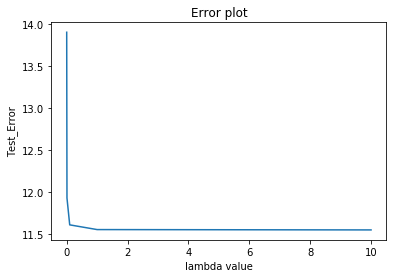

In [36]:
import matplotlib.pyplot as plt 

error = [(1-i)*100 for i in grid.cv_results_['mean_test_score']]
plt.plot(lam, error)
plt.title('Error plot')
plt.xlabel('lambda value')
plt.ylabel('Test_Error')
plt.show()

In [37]:
clf = LogisticRegression(C = optimal_a1)

clf.fit(bow_X_train,y_train)

pred = clf.predict(bow_X_test)

acc1 = accuracy_score(y_test, pred) * 100
pre1 = precision_score(y_test, pred) * 100
rec1 = recall_score(y_test, pred) * 100
f11 = f1_score(y_test, pred) * 100

print('\nAccuracy=%f%%' % (acc1))
print('\nprecision=%f%%' % (pre1))
print('\nrecall=%f%%' % (rec1))
print('\nF1-Score=%f%%' % (f11))


Accuracy=88.333110%

precision=90.130257%

recall=95.502151%

F1-Score=92.738477%


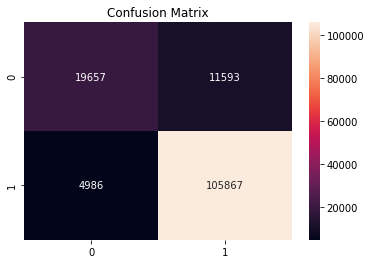

In [38]:
import seaborn as sns
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [39]:

clf = LogisticRegression(C = optimal_a1 , penalty='l1')

clf.fit(bow_X_train,y_train)

pred = clf.predict(bow_X_test)

acc2 = accuracy_score(y_test, pred) * 100
pre2 = precision_score(y_test, pred) * 100
rec2 = recall_score(y_test, pred) * 100
f12 = f1_score(y_test, pred) * 100

print('\nAccuracy=%f%%' % (acc2))
print('\nprecision=%f%%' % (pre2))
print('\nrecall=%f%%' % (rec2))
print('\nF1-Score=%f%%' % (f12))


Accuracy=88.333110%

precision=90.127524%

recall=95.505760%

F1-Score=92.738732%


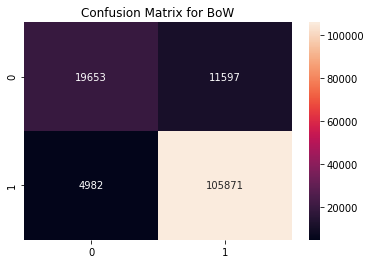

In [40]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.title('Confusion Matrix for BoW')
plt.show()

In [41]:

x = PrettyTable()

reg1 = 'L2'
reg2 = 'L1'
cv = 'Grid'
x.field_names = ["CV","Regularizer","C","Test_Acc(%)","Test_Error(%)","Precision(%)","Recall(%)","F1-Score(%)"]

acc1 = np.around(acc1, decimals = 2)
err1 = np.around(100-acc1, decimals = 2) 
pre1 = np.around(pre1, decimals = 2)
rec1 = np.around(rec1, decimals = 2)
f11 = np.around(f11, decimals = 2)

acc2 = np.around(acc2, decimals = 2)
err2 = np.around(100-acc2, decimals = 2) 
pre2 = np.around(pre2, decimals = 2)
rec2 = np.around(rec2, decimals = 2)
f12 = np.around(f12, decimals = 2)

x.add_row([cv,reg1,optimal_a1,acc1,err1,pre1,rec1,f11])
x.add_row([cv,reg2,optimal_a1,acc2,err2,pre2,rec2,f12])

print(x)

+------+-------------+----+-------------+---------------+--------------+-----------+-------------+
|  CV  | Regularizer | C  | Test_Acc(%) | Test_Error(%) | Precision(%) | Recall(%) | F1-Score(%) |
+------+-------------+----+-------------+---------------+--------------+-----------+-------------+
| Grid |      L2     | 10 |    88.33    |     11.67     |    90.13     |    95.5   |    92.74    |
| Grid |      L1     | 10 |    88.33    |     11.67     |    90.13     |   95.51   |    92.74    |
+------+-------------+----+-------------+---------------+--------------+-----------+-------------+


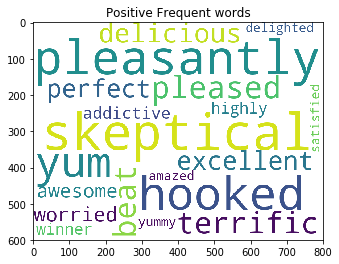

In [42]:
positive_log = np.array(list(map(abs,clf.coef_))).argsort()[0][1970:2000]

pos={}

for index in positive_log:
    for i in count_vect.vocabulary_:
        if count_vect.vocabulary_[i] == index:
            pos[i]=clf.coef_[0][index]
            

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 600,
background_color ='white').generate_from_frequencies(pos)
plt.imshow(wordcloud)
plt.title("Positive Frequent words")
plt.show()

### RandomizedSearchCV

In [43]:
from scipy.stats import uniform
clf = LogisticRegression()
param_grid = { 'C':uniform()}
grid = RandomizedSearchCV(estimator = clf,param_distributions=param_grid ,cv = 5,n_jobs = 3)
grid.fit(bow_X_train, y_train)
print("best C = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
a = grid.best_params_
optimal_a1 = a.get('C')

best C =  {'C': 0.86453718506282}
Accuracy on train data =  88.45013464443548


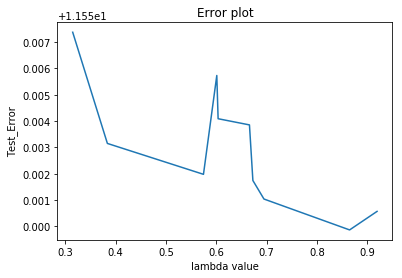

In [44]:
lam =[]
for i in range(10):
    lam.append(grid.cv_results_['params'][i]['C'])
ind = np.argsort(lam)
error = [(1-i)*100 for i in grid.cv_results_['mean_test_score']]han
l_values=[]
err=[]
for i in ind:
    l_values.append(lam[i])
    err.append(error[i])
plt.plot(l_values, err)
plt.title('Error plot')
plt.xlabel('lambda value')
plt.ylabel('Test_Error')
plt.show()

#### Using L2 Regularizer

In [45]:
clf = LogisticRegression(C = optimal_a1)

clf.fit(bow_X_train,y_train)

pred = clf.predict(bow_X_test)

acc1 = accuracy_score(y_test, pred) * 100
pre1 = precision_score(y_test, pred) * 100
rec1 = recall_score(y_test, pred) * 100
f11 = f1_score(y_test, pred) * 100

print('\nAccuracy=%f%%' % (acc1))
print('\nprecision=%f%%' % (pre1))
print('\nrecall=%f%%' % (rec1))
print('\nF1-Score=%f%%' % (f11))


Accuracy=88.328184%

precision=90.112593%

recall=95.518389%

F1-Score=92.736779%


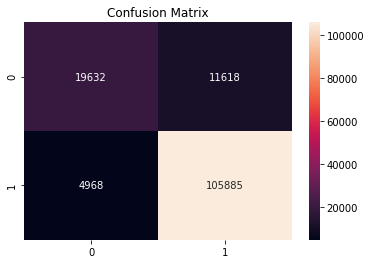

In [46]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

#### Using L1 Regularizer

In [47]:
clf = LogisticRegression(C = optimal_a1 , penalty='l1')

clf.fit(bow_X_train,y_train)

pred = clf.predict(bow_X_test)

acc2 = accuracy_score(y_test, pred) * 100
pre2 = precision_score(y_test, pred) * 100
rec2 = recall_score(y_test, pred) * 100
f12 = f1_score(y_test, pred) * 100

print('\nAccuracy=%f%%' % (acc2))
print('\nprecision=%f%%' % (pre2))
print('\nrecall=%f%%' % (rec2))
print('\nF1-Score=%f%%' % (f12))


Accuracy=88.321851%

precision=90.093409%

recall=95.534627%

F1-Score=92.734270%


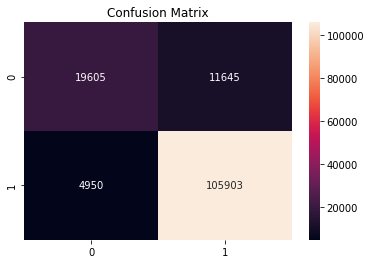

In [48]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [49]:
x = PrettyTable()

reg1 = 'L2'
reg2 = 'L1'
cv = 'Random'
x.field_names = ["CV","Regularizer","C","Test_Acc(%)","Test_Error(%)","Precision(%)","Recall(%)","F1-Score(%)"]

acc1 = np.around(acc1, decimals = 2)
err1 = np.around(100-acc1, decimals = 2) 
pre1 = np.around(pre1, decimals = 2)
rec1 = np.around(rec1, decimals = 2)
f11 = np.around(f11, decimals = 2)


acc2 = np.around(acc2, decimals = 2)
err2 = np.around(100-acc2, decimals = 2) 
pre2 = np.around(pre2, decimals = 2)
rec2 = np.around(rec2, decimals = 2)
f12 = np.around(f12, decimals = 2)

x.add_row([cv,reg1,optimal_a1,acc1,err1,pre1,rec1,f11])
x.add_row([cv,reg2,optimal_a1,acc2,err2,pre2,rec2,f12])

print(x)

+--------+-------------+------------------+-------------+---------------+--------------+-----------+-------------+
|   CV   | Regularizer |        C         | Test_Acc(%) | Test_Error(%) | Precision(%) | Recall(%) | F1-Score(%) |
+--------+-------------+------------------+-------------+---------------+--------------+-----------+-------------+
| Random |      L2     | 0.86453718506282 |    88.33    |     11.67     |    90.11     |   95.52   |    92.74    |
| Random |      L1     | 0.86453718506282 |    88.32    |     11.68     |    90.09     |   95.53   |    92.73    |
+--------+-------------+------------------+-------------+---------------+--------------+-----------+-------------+


## Perturbation Test

### Pertubation test means adding noise to one of the data point and comparing the difference b/w change in previous weights and New weights to find of collinearity.

In [50]:
# to calculate percentage change for both weights

def Weight_change(Pre_weights,New_weights):
    ch = 0
    for i in range(Pre_weights.shape[0]):
        if Pre_weights[i] != New_weights[i]:
            ch += 1
    
    per = (ch / Pre_weights.shape[0])*100
    
    return per
        

# Calculating previous weights

pre_w = clf.coef_[0]

noise_data = bow_X_train.todense()
noise_data[1323] += 0.01

clf = LogisticRegression(C = optimal_a1 , penalty='l1')
clf.fit(noise_data,y_train)

new_w = clf.coef_[0]

per_Change = Weight_change(pre_w,new_w)

print(per_Change)

98.55000000000001


## Weights differ so much we can say features are collinear

## Increasing lambda value to see error reports and sparsity check on L1 regularizer. As C Decreases Lambda value Increases

In [51]:
clf = LogisticRegression(C=100, penalty='l1')
clf.fit(bow_X_train, y_train)

pred = clf.predict(bow_X_test)
ac1 = accuracy_score(y_test, pred) * 100
er1 = np.around(100 - ac1, decimals = 2)

w = clf.coef_
s1 = np.count_nonzero(w)

#======================================================================

clf = LogisticRegression(C=10, penalty='l1')
clf.fit(bow_X_train, y_train)

pred = clf.predict(bow_X_test)
ac2 = accuracy_score(y_test, pred) * 100
er2 = np.around(100 - ac2, decimals = 2)

w = clf.coef_
s2 = np.count_nonzero(w)

#======================================================================

clf = LogisticRegression(C=1, penalty='l1')
clf.fit(bow_X_train, y_train)

pred = clf.predict(bow_X_test)
ac3 = accuracy_score(y_test, pred) * 100
er3 = np.around(100 - ac3, decimals = 2)

w = clf.coef_
s3 = np.count_nonzero(w)

#======================================================================

clf = LogisticRegression(C=0.1, penalty='l1')
clf.fit(bow_X_train, y_train)

pred = clf.predict(bow_X_test)
ac4 = accuracy_score(y_test, pred) * 100
er4 = np.around(100 - ac4, decimals = 2)

w = clf.coef_
s4 = np.count_nonzero(w)

#======================================================================

clf = LogisticRegression(C=0.01, penalty='l1')
clf.fit(bow_X_train, y_train)

pred = clf.predict(bow_X_test)
ac5 = accuracy_score(y_test, pred) * 100
er5 = np.around(100 - ac5, decimals = 2)

w = clf.coef_
s5 = np.count_nonzero(w)


In [52]:
### Sparsity is Number of Non-Zero elements in weight vector

In [53]:
x = PrettyTable()

c = [100,10,1,0.1,0.01]

x.field_names = ['C','Train_Error(%)','Sparsity']

x.add_row([c[0],er1,s1])
x.add_row([c[1],er2,s2])
x.add_row([c[2],er3,s3])
x.add_row([c[3],er4,s4])
x.add_row([c[4],er5,s5])

print(x)

+------+----------------+----------+
|  C   | Train_Error(%) | Sparsity |
+------+----------------+----------+
| 100  |     11.67      |   1998   |
|  10  |     11.67      |   1998   |
|  1   |     11.67      |   1975   |
| 0.1  |     11.75      |   1765   |
| 0.01 |      12.8      |   744    |
+------+----------------+----------+
